In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MARKET_NAMES = ['DOW_30', 'NIK_25', 'LA_40']
MODEL_BASE_NAME = 'RL_CNN'

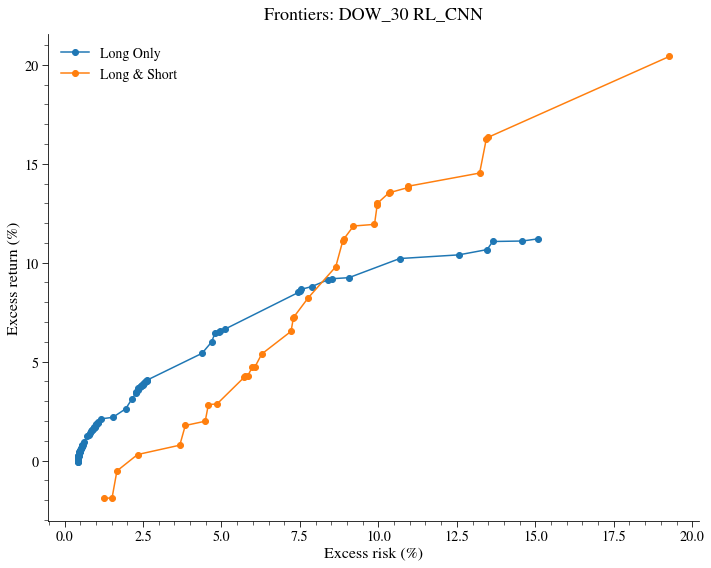

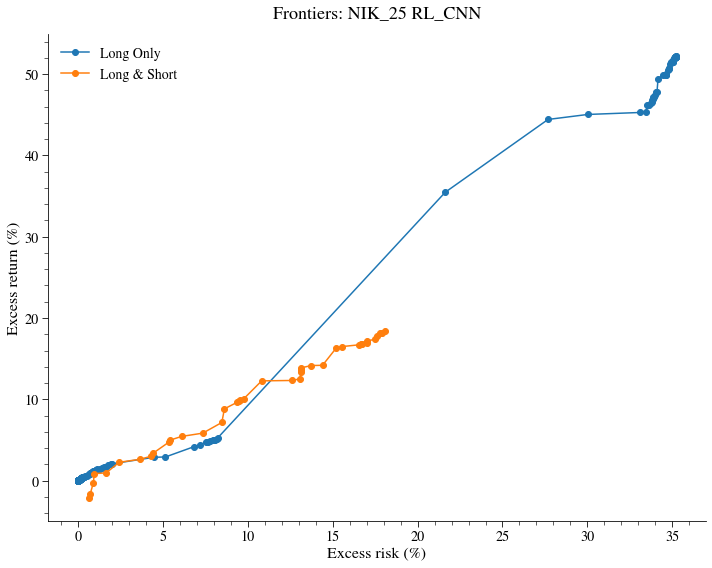

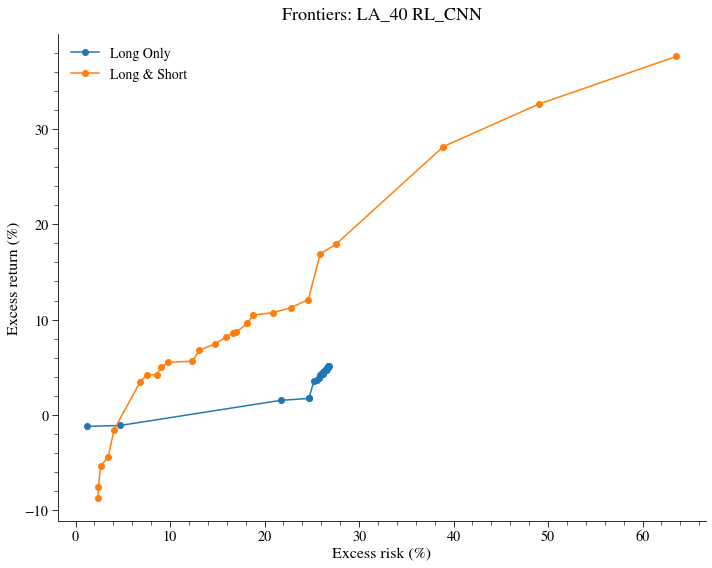

In [3]:
for market_name in MARKET_NAMES:
    # load data
    long_only_df = pd.read_csv(f'{market_name}/seeded/{MODEL_BASE_NAME}/backtests/{market_name}_{MODEL_BASE_NAME}_seed_frontiers_long_only.csv')
    long_short_df = pd.read_csv(f'{market_name}/seeded/{MODEL_BASE_NAME}/backtests/{market_name}_{MODEL_BASE_NAME}_seed_frontiers.csv')

    seed = 0
    frontier_dict = {
        'Long Only': long_only_df,
        'Long & Short': long_short_df,
    }

    fig, ax = plt.subplots(figsize=(10,8))

    for name, df in frontier_dict.items():
        frontier_df = df[(df['seed']==seed) & (df['is_pareto']==True)]
        ax.plot(frontier_df['excess_risk'], frontier_df['excess_return'], '-o', label=name) # frontier

    ax.set_xlabel('Excess risk (%)')
    ax.set_ylabel('Excess return (%)')
    plot_title = f'Frontiers: {market_name} {MODEL_BASE_NAME}'
    ax.set_title(plot_title)
    ax.legend()

    # if xlim != None:
    #     ax.set_xlim(xlim)

    # if ylim != None:
    #     ax.set_ylim(ylim)